# Covid19 Project

### Problem Statement:

>Coronavirus disease 2019 (COVID-19) time series listing confirmed cases, reported deaths, and reported recoveries. Data is disaggregated by country (and sometimes sub-region). Coronavirus disease (COVID-19) is caused by Severe acute respiratory syndrome Coronavirus 2 (SARS-CoV-2) and has had a worldwide effect. On March 11, 2020, the World Health Organization (WHO) declared it a pandemic, pointing to the over 118,000 cases of the coronavirus illness in over 110 countries and territories around the world at the time.

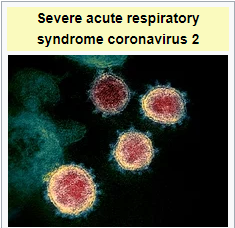

### This dataset includes data for tracking the number of people affected by COVID-19 worldwide, including:

1. Confirmed tested cases of Coronavirus infection
2. The number of people who have reportedly died while sick with Coronavirus
3. The number of people who have reportedly recovered from it

We will start our Analysis in importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### EDA- Preprocessing Pipeline:

In [2]:
df = pd.read_csv("aggregate_covid_country.csv")
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [3]:
df.drop("Date",axis = 1, inplace = True)

In [4]:
df.isnull().sum()

Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

### We dont have null values in the data.
### Encoding the Data with Label Encoder converting all the catagorical data into numeric values.

In [5]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
catagorical_data = ['Country']

for i in catagorical_data:
    df[i]=LE.fit_transform(df[i])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Country    23688 non-null  int32
 1   Confirmed  23688 non-null  int64
 2   Recovered  23688 non-null  int64
 3   Deaths     23688 non-null  int64
dtypes: int32(1), int64(3)
memory usage: 647.8 KB


In [7]:
df.Country.value_counts()

175    126
164    126
117    126
101    126
85     126
      ... 
58     126
42     126
26     126
10     126
0      126
Name: Country, Length: 188, dtype: int64

### The above data says that each country have 126 aggregation so 188 times 126 which is 23688.

### Correlation

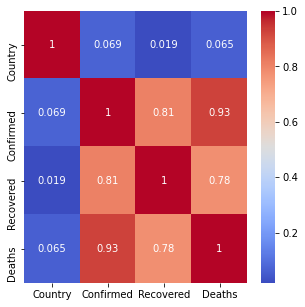

In [8]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot = True, cmap = "coolwarm")
plt.show()

### The observation of Correlation and the detail we will visualize with Target variable
    1. Deaths
    2. Recovered
    3 confirmed

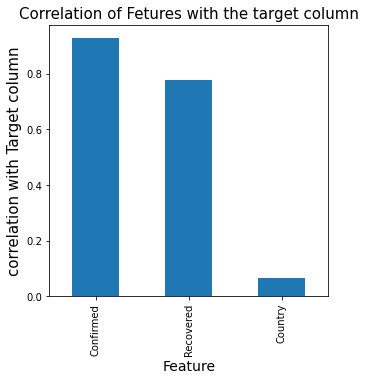

In [9]:
plt.figure(figsize=(5,5))
df.corr()["Deaths"].sort_values(ascending=False).drop(["Deaths"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 15)
plt.title("Correlation of Fetures with the target column", fontsize=15)
plt.show()

Confirmed have more corrlaation with Death

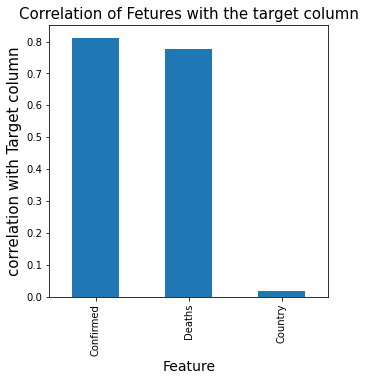

In [10]:
plt.figure(figsize=(5,5))
df.corr()["Recovered"].sort_values(ascending=False).drop(["Recovered"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 15)
plt.title("Correlation of Fetures with the target column", fontsize=15)
plt.show()

Confirmed have more corrlaation with recovered

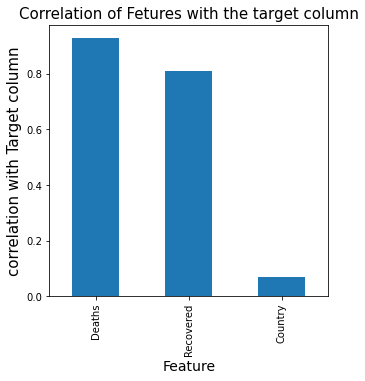

In [11]:
plt.figure(figsize=(5,5))
df.corr()["Confirmed"].sort_values(ascending=False).drop(["Confirmed"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 15)
plt.title("Correlation of Fetures with the target column", fontsize=15)
plt.show()

Death have more corelation with confirmed

From the above three observation its cleare that Country have lesser corelation with all the three dependent variable.

### Skeness Identification

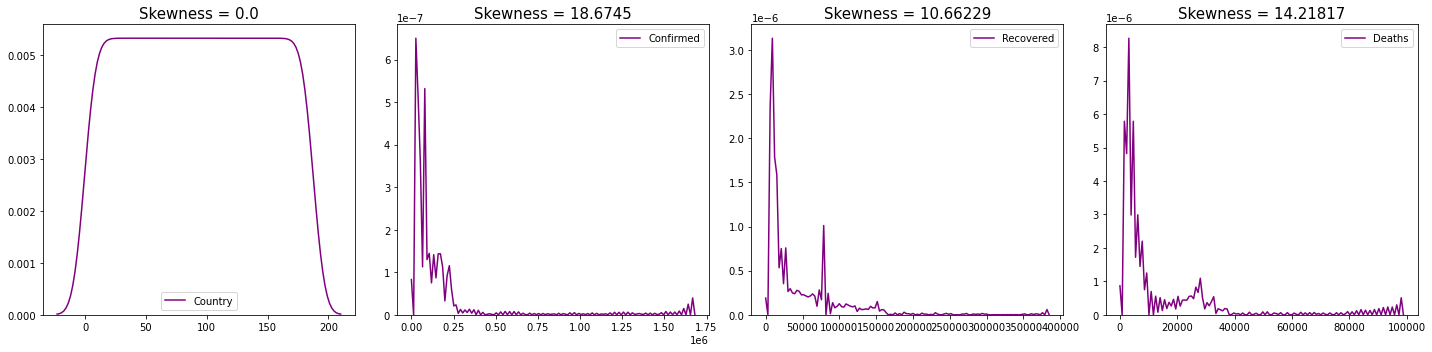

In [12]:
plt.figure(figsize=(20,5))
collist = df.columns.values
for i in range (0, len(collist)):
    plt.subplot(1,4,i+1)         
    sns.kdeplot(df[collist[i]], color = "purple")
    plt.title(f"Skewness = {round(df[collist[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

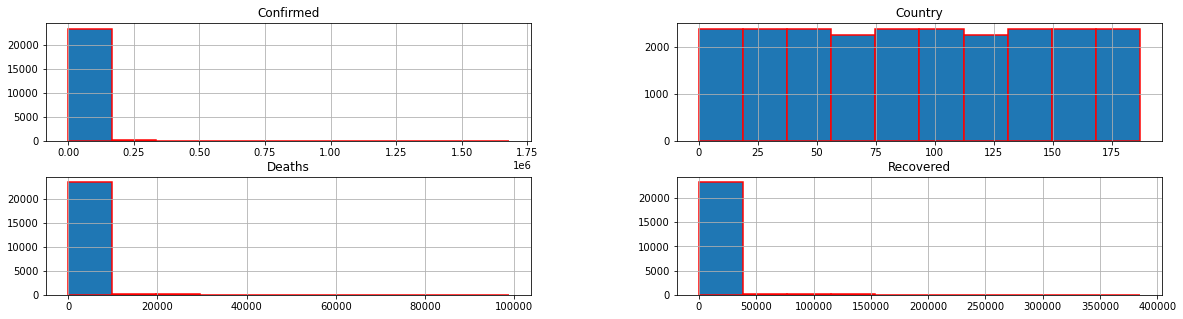

In [13]:
df.hist(edgecolor="red",linewidth= 1.5, figsize= (20,5))
plt.show()

In [14]:
df.skew()

Country       0.000000
Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

all the three continous data have skewness beyond 0.5 we will use yeo johnson method to regulatize the data 

BELOW GRAPH WILL SHOW THE SKEWNESS OF THE DATA


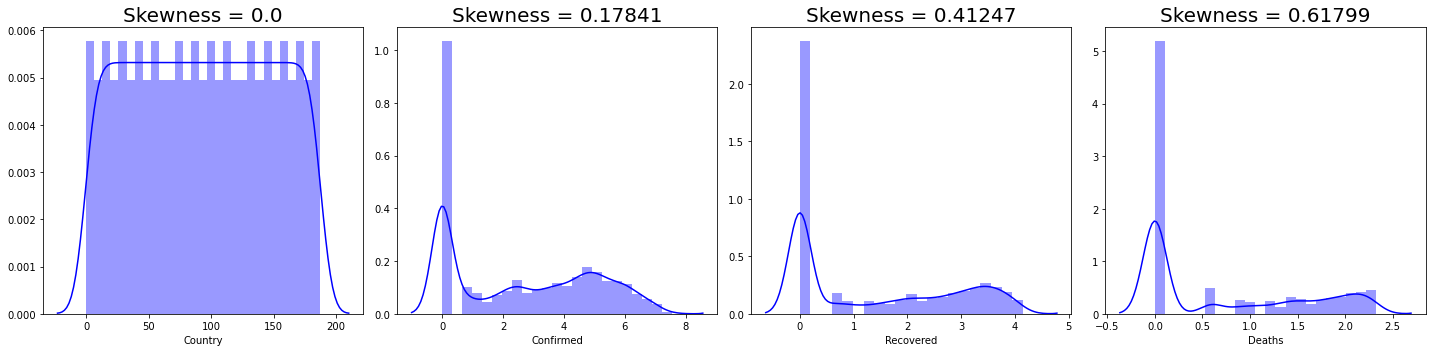

In [15]:
from scipy.stats import yeojohnson
skew= ["Confirmed","Recovered","Deaths" ]

for i in skew:
    df[i] =  yeojohnson(df[i])[0]
print("BELOW GRAPH WILL SHOW THE SKEWNESS OF THE DATA")
plt.figure(figsize=(20,5))
for i in range (0, len(collist)):
    plt.subplot(1,4,i+1)
    plt.title(f"Skewness = {round(df[collist[i]].skew(),5)}",fontsize=20)         
    sns.distplot(df[collist[i]], color = "b")
    plt.tight_layout()     

In [16]:
gal1="#1c3355"
gal2="#4576c0"
gal3="#6991cc"
gal4="#8eacd8"
gal5="#d7e1f1"

### Lets Identify the outliers and remove them.

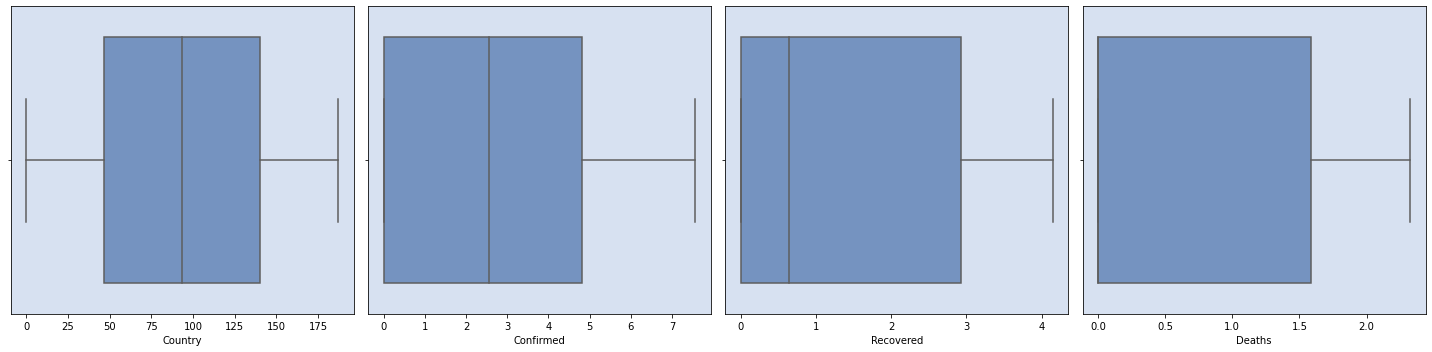

In [17]:
plt.figure(figsize=(20,5))
collist = df.columns.values
for i in range (0, len(collist)):
    plt.subplot(1,4,i+1)
    ax=sns.boxplot(df[collist[i]], color = gal3 , orient = "h")
    ax.set_facecolor(gal5)
    plt.tight_layout()

In [18]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df))
threshold= 3
df_new = df[(z < 3).all(axis=1)]

In [19]:
print(f"Orginal Data {df.shape}\nAfter Removing outliers {df_new.shape}\nThe percentage of data loss {((23688-23688)/23688)*100}%")

Orginal Data (23688, 4)
After Removing outliers (23688, 4)
The percentage of data loss 0.0%


The above daata says there is no outliers present in the data

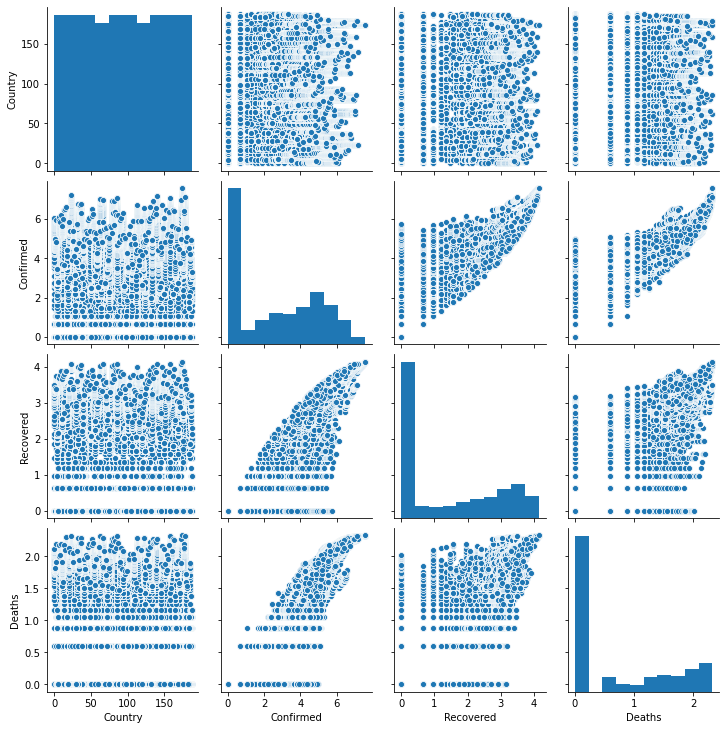

In [20]:
 sns.pairplot(df)

we can see the dispersment of the data according to the correlation of the data

In [21]:
x_1=df.drop(['Deaths'], axis = 1)
y_1=df['Deaths']
x_2=df.drop(["Recovered"], axis = 1)
y_2=df.Recovered
x_3=df.drop(["Confirmed"], axis = 1)
y_3=df.Confirmed

### Filtering best parameters for the model

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,1000):
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train_1,y_train_1)
    y_pred_1 = mod.predict(x_test_1)
    tempacc = r2_score(y_test_1,y_pred_1)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 84.22009058970353 found on randomstate 749


In [24]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size = .25, random_state = best_rstate)

In [25]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

### Shortlisting the best model

In [26]:
models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=42), RandomForestRegressor(random_state=42)]

model_names = ["LinearRegression", "Lasso", "Ridge", "ElasticNet", "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "AdaBoostRegressor", "RandomForestRegressor"]

In [27]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]

for m in models:
    m.fit(x_train_1,y_train_1)
    print("Score of", m, "is:", m.score(x_train_1,y_train_1))
    score.append(m.score(x_train_1,y_train_1))
    predm=m.predict(x_test_1)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test_1,predm))
    mean_abs_e.append(mean_absolute_error(y_test_1,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test_1,predm))
    mean_sqr_e.append(mean_squared_error(y_test_1,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test_1,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test_1,predm)))
    print("R2 SCORE: ", r2_score(y_test_1,predm))
    r2.append(r2_score(y_test_1,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.8230765272728098

ERROR:
MEAN ABSOLUTE ERROR:  0.2543971354568993
MEAN SQUARED ERROR:  0.12086987676370838
ROOT MEAN SQUARED ERROR : 0.3476634533046411
R2 SCORE:  0.8422009058970353
**********************************************************************************************************



Score of Lasso() is: 0.5591328375131307

ERROR:
MEAN ABSOLUTE ERROR:  0.5092125888111938
MEAN SQUARED ERROR:  0.3289609166667199
ROOT MEAN SQUARED ERROR : 0.5735511456415373
R2 SCORE:  0.5705320793304942
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.8230765270626793

ERROR:
MEAN ABSOLUTE ERROR:  0.25439863885748654
MEAN SQUARED ERROR:  0.1208698135109709
ROOT MEAN SQUARED ERROR : 0.34766336233628486
R2 SCORE:  0.8422009884753
**********************************************************************************************************



Score of ElasticNet() i

In [28]:
mean_score=[]
STD=[]
for m in models:
    CV=cross_val_score(m,x_1,y_1,cv=5,scoring="r2")
    print("SCORE OF",m,"IS:")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS:
SCORE IS: [-0.98402457  0.24006969  0.65602976  0.7040227   0.64436364]
MEAN OF SCORE is : 0.25209224375065037
Standard Deviation : 0.6402207159590274
**************************************************************************************************



SCORE OF Lasso() IS:
SCORE IS: [-6.57454789 -1.15102912  0.45188316  0.04021051 -0.60852692]
MEAN OF SCORE is : -1.5684020533615661
Standard Deviation : 2.56227411787635
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS:
SCORE IS: [-0.98395724  0.24007223  0.65602709  0.704024    0.6443678 ]
MEAN OF SCORE is : 0.25210677579763835
Standard Deviation : 0.6401950643204131
**************************************************************************************************



SCORE OF ElasticNet() IS:
SCORE IS: [-1.09053422 -0.14502899  0.52977801  0.39718882  0.06828087]
MEAN OF SCORE is : -0.04806310212044631
Standar

In [29]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": mean_score,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="SCORE", ascending=False)

,MODEL,SCORE,CV_mean_score,CV_STD,MBE,MSE,RMSE,R2
6,DecisionTreeRegressor,0.999796,0.680110,0.077052,0.039613,0.028194,0.167910,0.963192
8,RandomForestRegressor,0.996658,0.777858,0.051894,0.043223,0.014358,0.119827,0.981255
5,KNeighborsRegressor,0.994394,0.814065,0.097528,0.022470,0.006513,0.080705,0.991497
7,AdaBoostRegressor,0.879707,0.715186,0.043393,0.183811,0.084281,0.290311,0.889969
0,LinearRegression,0.823077,0.252092,0.640221,0.254397,0.120870,0.347663,0.842201
2,Ridge,0.823077,0.252107,0.640195,0.254399,0.120870,0.347663,0.842201
4,SVR,0.819205,0.438527,0.292663,0.234940,0.122712,0.350302,0.839796
3,ElasticNet,0.710330,-0.048063,0.573033,0.374752,0.209630,0.457853,0.726323
1,Lasso,0.559133,-1.568402,2.562274,0.509213,0.328961,0.573551,0.570532


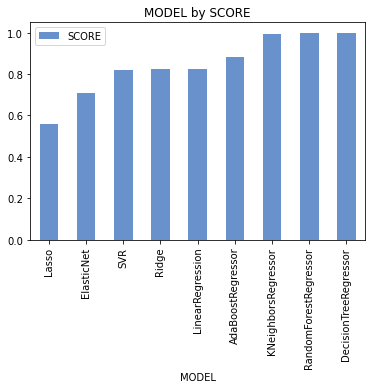

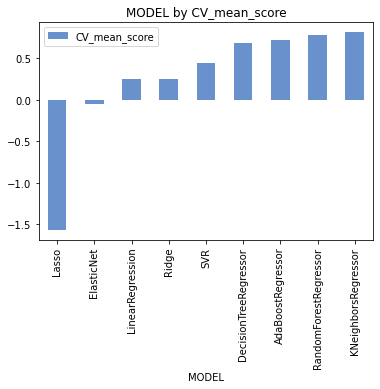

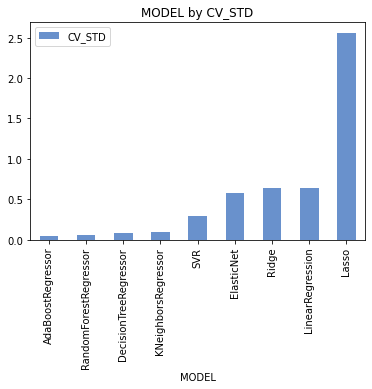

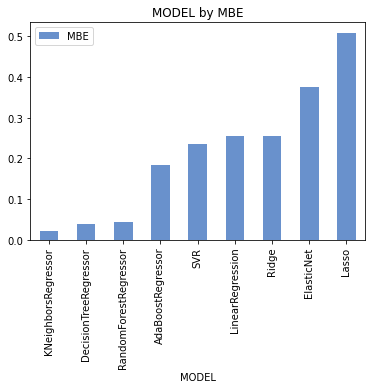

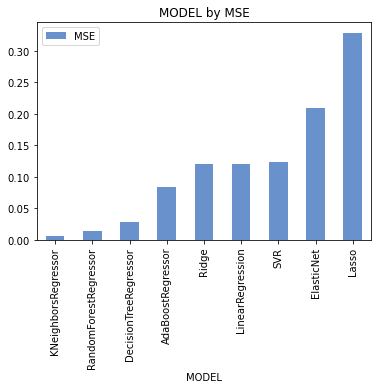

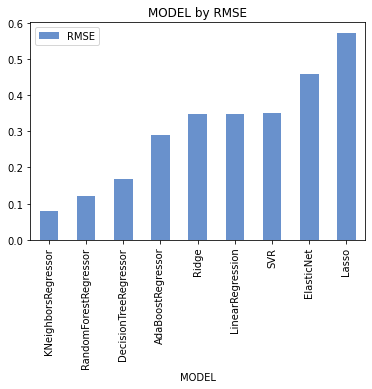

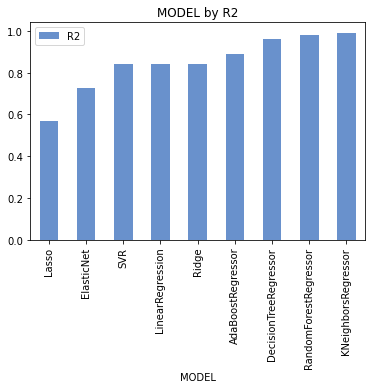

In [30]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = gal3)
    plt.title(f"MODEL by {metric}")
    plt.show()

### We have three models have 99% accuracy but we will take k neighbour regressor whose CV score is higher and we will save the modelsincealready modelhave 99% accuracy

In [31]:
knn= KNeighborsRegressor()
cross_val_predict(knn,x_train_1,y_train_1,cv=5, n_jobs=-1).mean()

0.7174602408427017

### 2ed Target variable training.... 

In [33]:

accu = 0
for i in range(0,1000):
    x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train_2,y_train_2)
    y_pred_2 = mod.predict(x_test_2)
    tempacc = r2_score(y_test_2,y_pred_2)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 88.38777885998704 found on randomstate 386


In [34]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size = .25, random_state = best_rstate)


In [35]:
score_2= []
mean_abs_e_2=[]
mean_sqr_e_2=[]
root_mean_e_2=[]
r2_2=[]

for m in models:
    m.fit(x_train_2,y_train_2)
    print("Score of", m, "is:", m.score(x_train_2,y_train_2))
    score_2.append(m.score(x_train_2,y_train_2))
    predm=m.predict(x_test_2)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test_2,predm))
    mean_abs_e_2.append(mean_absolute_error(y_test_2,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test_2,predm))
    mean_sqr_e_2.append(mean_squared_error(y_test_2,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test_2,predm)))
    root_mean_e_2.append(np.sqrt(mean_squared_error(y_test_2,predm)))
    print("R2 SCORE: ", r2_score(y_test_2,predm))
    r2_2.append(r2_score(y_test_2,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.8678698429734524

ERROR:
MEAN ABSOLUTE ERROR:  0.3452860963828282
MEAN SQUARED ERROR:  0.26274499446072735
ROOT MEAN SQUARED ERROR : 0.5125865726496621
R2 SCORE:  0.8838777885998704
**********************************************************************************************************



Score of Lasso() is: 0.7708082809816557

ERROR:
MEAN ABSOLUTE ERROR:  0.600614179421913
MEAN SQUARED ERROR:  0.4952405562450304
ROOT MEAN SQUARED ERROR : 0.7037332990878223
R2 SCORE:  0.7811245512621974
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.8678698416610197

ERROR:
MEAN ABSOLUTE ERROR:  0.3452955181430944
MEAN SQUARED ERROR:  0.2627461936007472
ROOT MEAN SQUARED ERROR : 0.5125877423434423
R2 SCORE:  0.883877258630532
**********************************************************************************************************



Score of ElasticNet() is

In [36]:
mean_score_2=[]
STD_2=[]
for m in models:
    CV=cross_val_score(m,x_2,y_2,cv=5,scoring="r2")
    print("SCORE OF",m,"IS:")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score_2.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD_2.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS:
SCORE IS: [0.54712294 0.62657083 0.46160995 0.76163997 0.3363311 ]
MEAN OF SCORE is : 0.5466549593036399
Standard Deviation : 0.144273419482746
**************************************************************************************************



SCORE OF Lasso() IS:
SCORE IS: [-1.23203134  0.24018505  0.43552069  0.44702879 -1.1643245 ]
MEAN OF SCORE is : -0.25472426126332665
Standard Deviation : 0.7741230382009225
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS:
SCORE IS: [0.54708058 0.62655602 0.46160103 0.76165954 0.33634216]
MEAN OF SCORE is : 0.5466478664695205
Standard Deviation : 0.14427541296926374
**************************************************************************************************



SCORE OF ElasticNet() IS:
SCORE IS: [-0.1175778   0.41808077  0.43325147  0.57659859 -0.60712429]
MEAN OF SCORE is : 0.14064574724936807
Standard Deviatio

In [37]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score_2,
                                  "CV_mean_score": mean_score_2,
                                  "CV_STD": STD_2,
                                  "MBE": mean_abs_e_2,
                                  "MSE": mean_sqr_e_2,
                                  "RMSE": root_mean_e_2,
                                  "R2":r2_2 
                                 })
Regression_result.sort_values(by="SCORE", ascending=False)

,MODEL,SCORE,CV_mean_score,CV_STD,MBE,MSE,RMSE,R2
6,DecisionTreeRegressor,0.994700,0.483340,0.167522,0.089728,0.085753,0.292837,0.962101
8,RandomForestRegressor,0.991720,0.636558,0.091066,0.097655,0.057777,0.240368,0.974465
5,KNeighborsRegressor,0.988697,0.538477,0.278741,0.064357,0.033036,0.181758,0.985400
0,LinearRegression,0.867870,0.546655,0.144273,0.345286,0.262745,0.512587,0.883878
2,Ridge,0.867870,0.546648,0.144275,0.345296,0.262746,0.512588,0.883877
4,SVR,0.859197,0.543514,0.135679,0.343935,0.282439,0.531450,0.875174
7,AdaBoostRegressor,0.855464,0.532960,0.294333,0.381232,0.311932,0.558508,0.862139
3,ElasticNet,0.808760,0.140646,0.442376,0.511233,0.406744,0.637765,0.820236
1,Lasso,0.770808,-0.254724,0.774123,0.600614,0.495241,0.703733,0.781125


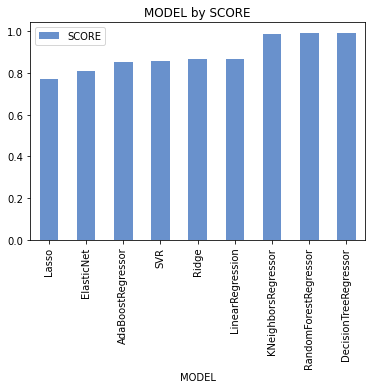

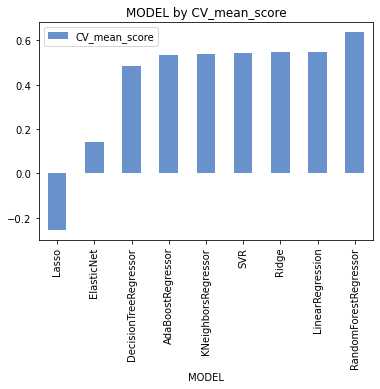

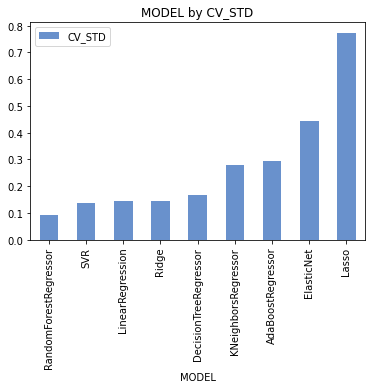

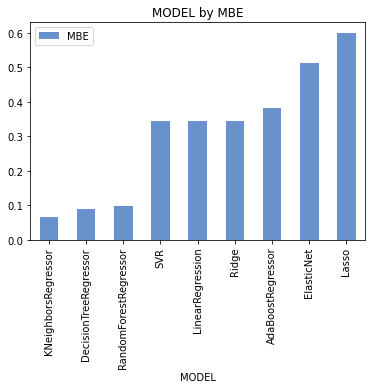

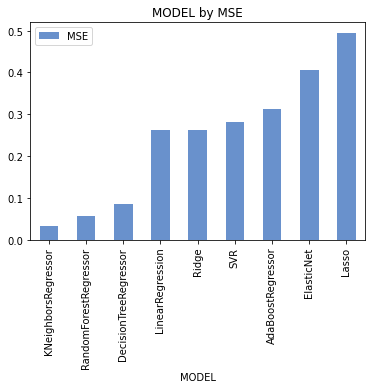

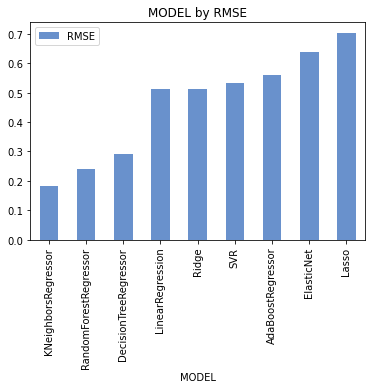

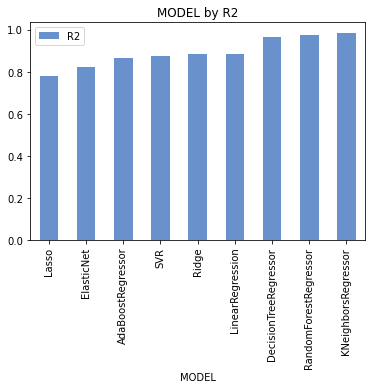

In [38]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = gal3)
    plt.title(f"MODEL by {metric}")
    plt.show()

### From above we can see Random forest have score of 99% and alsohigher cv score so we will save  Random forest model

In [39]:
rfr= RandomForestRegressor(random_state=42)
cross_val_predict(rfr,x_train_2,y_train_2,cv=5, n_jobs=-1).mean()

1.4028216404028646

### 3rd Target variable training.... 

In [41]:
accu = 0
for i in range(0,1000):
    x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3,y_3,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train_3,y_train_3)
    y_pred_3 = mod.predict(x_test_3)
    tempacc = r2_score(y_test_3,y_pred_3)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")        
           

x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3,y_3,test_size = .25, random_state = best_rstate)

Best Accuracy 89.16172990945357 found on randomstate 480


In [42]:
score_3= []
mean_abs_e_3=[]
mean_sqr_e_3=[]
root_mean_e_3=[]
r2_3=[]

for m in models:
    m.fit(x_train_3,y_train_3)
    print("Score of", m, "is:", m.score(x_train_3,y_train_3))
    score_3.append(m.score(x_train_3,y_train_3))
    predm=m.predict(x_test_3)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test_3,predm))
    mean_abs_e_3.append(mean_absolute_error(y_test_3,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test_3,predm))
    mean_sqr_e_3.append(mean_squared_error(y_test_3,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test_3,predm)))
    root_mean_e_3.append(np.sqrt(mean_squared_error(y_test_3,predm)))
    print("R2 SCORE: ", r2_score(y_test_3,predm))
    r2_3.append(r2_score(y_test_3,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.8797236267216115

ERROR:
MEAN ABSOLUTE ERROR:  0.6117378653024783
MEAN SQUARED ERROR:  0.6172494852448384
ROOT MEAN SQUARED ERROR : 0.7856522673835024
R2 SCORE:  0.8916172990945357
**********************************************************************************************************



Score of Lasso() is: 0.7704173945188757

ERROR:
MEAN ABSOLUTE ERROR:  0.9866899809552874
MEAN SQUARED ERROR:  1.2564990753705383
ROOT MEAN SQUARED ERROR : 1.1209366955232298
R2 SCORE:  0.7793716046278124
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.8797236256154832

ERROR:
MEAN ABSOLUTE ERROR:  0.611736682850821
MEAN SQUARED ERROR:  0.6172500213325469
ROOT MEAN SQUARED ERROR : 0.7856526085570816
R2 SCORE:  0.8916172049630133
**********************************************************************************************************



Score of ElasticNet() is

In [43]:
mean_score_3=[]
STD_3=[]
for m in models:
    CV=cross_val_score(m,x_3,y_3,cv=5,scoring="r2")
    print("SCORE OF",m,"IS:")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score_3.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD_3.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS:
SCORE IS: [-0.5555618   0.58939533  0.45935328  0.83490029  0.79831088]
MEAN OF SCORE is : 0.4252795951725166
Standard Deviation : 0.5093302038802375
**************************************************************************************************



SCORE OF Lasso() IS:
SCORE IS: [-4.08967431 -0.01428644  0.43489822  0.52567757  0.3500142 ]
MEAN OF SCORE is : -0.5586741523922674
Standard Deviation : 1.77499517455476
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS:
SCORE IS: [-0.55566489  0.58938173  0.45935418  0.83491265  0.79834401]
MEAN OF SCORE is : 0.4252655341476702
Standard Deviation : 0.5093758863712751
**************************************************************************************************



SCORE OF ElasticNet() IS:
SCORE IS: [-3.68221454  0.05320937  0.47006119  0.58723494  0.45472648]
MEAN OF SCORE is : -0.4233965123532677
Standard D

In [44]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score_3,
                                  "CV_mean_score": mean_score_3,
                                  "CV_STD": STD_3,
                                  "MBE": mean_abs_e_3,
                                  "MSE": mean_sqr_e_3,
                                  "RMSE": root_mean_e_3,
                                  "R2":r2_3 
                                 })
Regression_result.sort_values(by="SCORE", ascending=False)

,MODEL,SCORE,CV_mean_score,CV_STD,MBE,MSE,RMSE,R2
6,DecisionTreeRegressor,0.947268,0.519008,0.412283,0.295556,0.292559,0.540888,0.948630
8,RandomForestRegressor,0.946814,0.550231,0.418406,0.297775,0.288155,0.536801,0.949403
5,KNeighborsRegressor,0.933219,0.409889,0.517371,0.314343,0.370985,0.609086,0.934859
7,AdaBoostRegressor,0.881372,0.240949,0.921827,0.664380,0.635367,0.797099,0.888436
0,LinearRegression,0.879724,0.425280,0.509330,0.611738,0.617249,0.785652,0.891617
2,Ridge,0.879724,0.425266,0.509376,0.611737,0.617250,0.785653,0.891617
4,SVR,0.855191,0.236602,0.750928,0.596308,0.733352,0.856360,0.871231
3,ElasticNet,0.788957,-0.423397,1.639377,0.944369,1.151454,1.073058,0.797816
1,Lasso,0.770417,-0.558674,1.774995,0.986690,1.256499,1.120937,0.779372


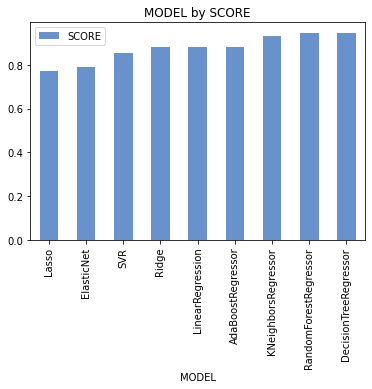

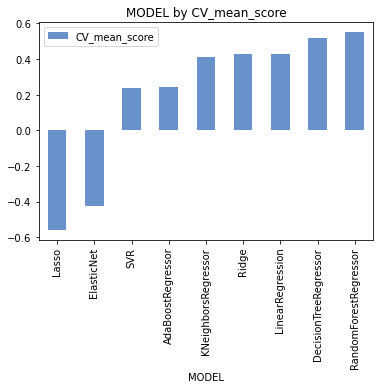

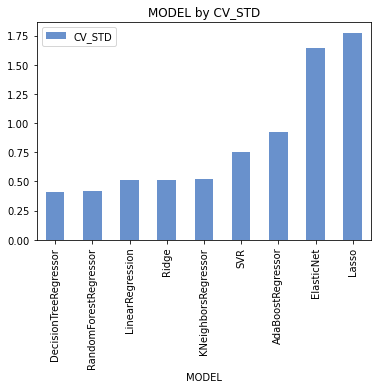

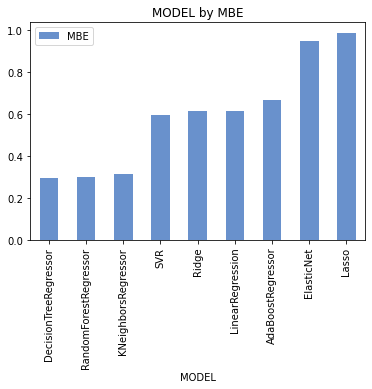

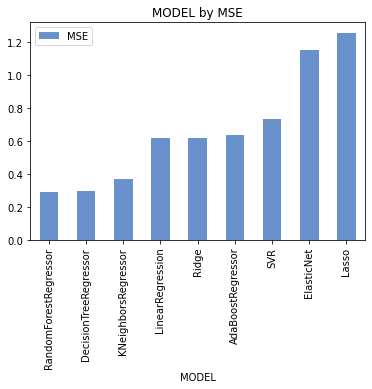

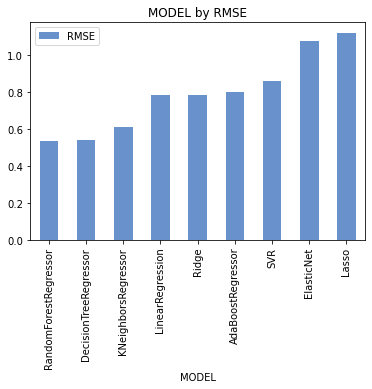

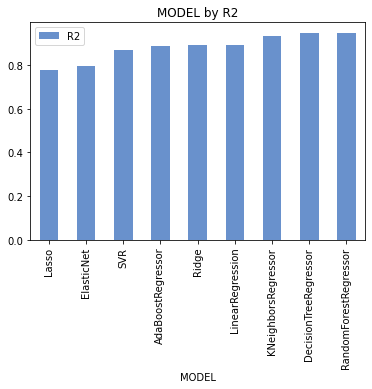

In [45]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = gal3)
    plt.title(f"MODEL by {metric}")
    plt.show()

### Again randomforest model hashigest CV score with model score of 94% we are saving model for further usage

In [46]:
rfr1= RandomForestRegressor(random_state=42)
cross_val_predict(rfr1,x_train_3,y_train_3,cv=5, n_jobs=-1).mean()

2.6401218142172964

In [47]:
knn.fit(x_train_1, y_train_1)
rfr.fit(x_train_2, y_train_2)
rfr1.fit(x_train_3, y_train_3)

RandomForestRegressor(random_state=42)

In [48]:
print(knn.score(x_train_1, y_train_1))

0.9943937536339944


In [49]:
print(rfr.score(x_train_2, y_train_2))

0.991719724174264


In [50]:
rfr1.score(x_train_3, y_train_3)

0.9468143409399502

# saving our models:

In [51]:
import joblib
joblib.dump(knn,"death_pred_model.obj")
joblib.dump(rfr,"recovered_pred_model.obj")
joblib.dump(rfr1,"confirmed_pred_model.obj")

['confirmed_pred_model.obj']

## CONCLUSION:
 
> The above study help us to understand the death recovered and covid confirmation prediction cases.  
 